In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio
import time 
%matplotlib inline

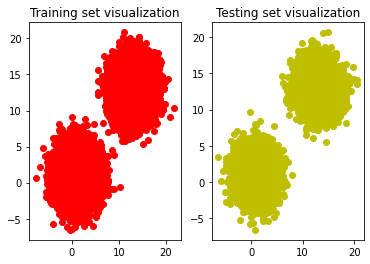

In [22]:
path = "../Data/Linearly_separable_dataset.mat"
Data = sio.loadmat(path)
Train = Data['train']
Test = Data['test']
plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(Train[:,0],Train[:,1],c='r',marker='o')
plt.title("Training set visualization")
plt.subplot(1, 2, 2)
plt.scatter(Test[:,0],Test[:,1],c='y',marker='o')
plt.title("Testing set visualization")
plt.show()


Running time: 4.5808830999994825 Seconds


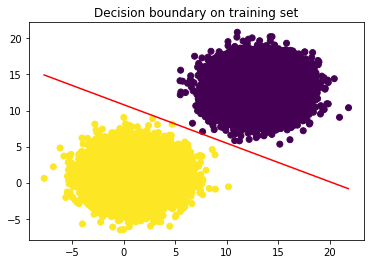

In [23]:
X = Train[:,0:2]
Y = Train[:,2]
X = np.c_[X,np.ones(X.shape[0])]
# X =np.c_(Train[:,0:1], np.ones((Train.shape[0],1)))
W = np.random.rand(3)
err =0;
start = time.perf_counter()
for _ in range(100):
    for i in range(X.shape[0]):
        tag = np.dot(X[i,:],W)
        if Y[i]*tag<0:
            W = W - 0.002*(-Y[i]*X[i,:])
            err = err+1;
        
    if err==0:
        break
end = time.perf_counter()
print('Running time: %s Seconds'%(end-start))
x1 = np.arange(np.min(X),np.max(X),0.1)
x2 = - W[0]/W[1]*x1 - W[2]/W[1]
plt.figure()
plt.scatter(Train[:,0],Train[:,1],c=Train[:,2],marker='o')
plt.plot(x1,x2,'r')
plt.title("Decision boundary on training set")
plt.show()

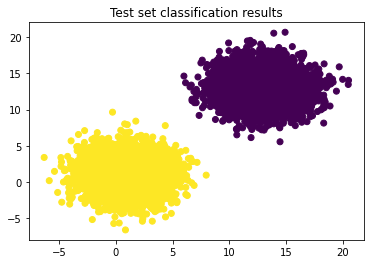

In [24]:
X_test = Test[:,0:2]
X_test = np.c_[X_test,np.ones(X_test.shape[0])]
label = Test[:,2]
Y_test = np.zeros(label.shape)
for i in range (X_test.shape[0]):
    if np.dot(X_test[i,:],W)<0:
        Y_test[i] = -1
    else:
        Y_test[i] = 1
plt.figure()
plt.scatter(X_test[:,0],X_test[:,1],c=Y_test,marker='o')
plt.title("Test set classification results")
plt.show()

